In [14]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import  OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

In [15]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check (1).csv


In [16]:
df=pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


<Axes: >

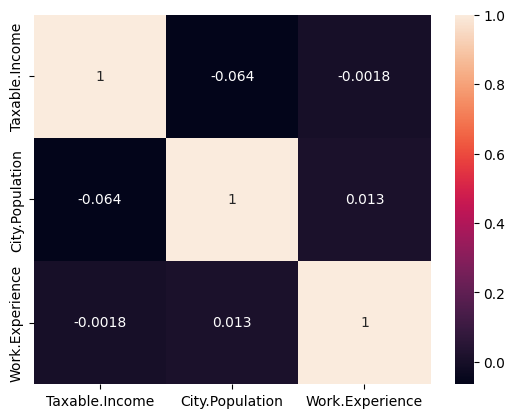

In [18]:
sns.heatmap(df.corr(),annot=True)


In [19]:
oe=OrdinalEncoder()
char_col=df.select_dtypes('object').columns
df[char_col]=oe.fit_transform(df[char_col])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0.0,2.0,68833,50047,10,1.0
1,1.0,0.0,33700,134075,18,1.0
2,0.0,1.0,36925,160205,30,1.0
3,1.0,2.0,50190,193264,15,1.0
4,0.0,1.0,81002,27533,28,0.0


In [20]:
target=[]
for i in df['Taxable.Income']:
    if i<=30000:
        target.append('Risky')
    else:
        target.append('Good')

df['tax_income']=target
df.drop(columns='Taxable.Income',inplace=True)
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_income
0,0.0,2.0,50047,10,1.0,Good
1,1.0,0.0,134075,18,1.0,Good
2,0.0,1.0,160205,30,1.0,Good
3,1.0,2.0,193264,15,1.0,Good
4,0.0,1.0,27533,28,0.0,Good
...,...,...,...,...,...,...
595,1.0,0.0,39492,7,1.0,Good
596,1.0,0.0,55369,2,1.0,Good
597,0.0,0.0,154058,0,1.0,Good
598,1.0,1.0,180083,17,0.0,Good


<Axes: xlabel='tax_income', ylabel='count'>

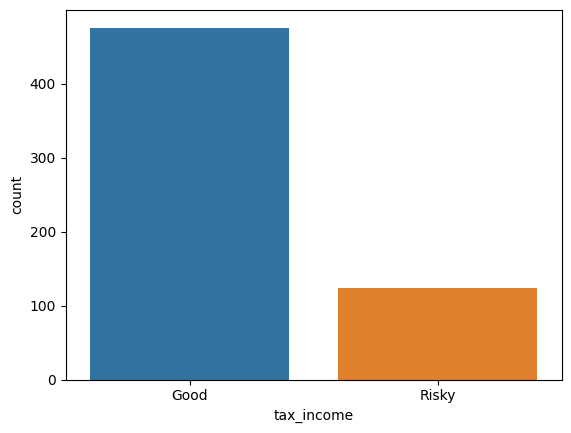

In [22]:
sns.countplot(data=df, x='tax_income')

In [23]:
x=df.iloc[:,:-1]
y=df['tax_income']

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=2)


In [25]:
def fun(model):
    re=model
    re.fit(xtrain,ytrain)
    ypred=re.predict(xtest)
    print(classification_report(ytest,ypred))
    print(confusion_matrix(ytest,ypred))
    print(f'tranning score {re.score(xtrain,ytrain)}')
    print(f'testing score {re.score(xtest,ytest)}')

In [26]:
fun(RandomForestClassifier())

              precision    recall  f1-score   support

        Good       0.77      0.93      0.84       117
       Risky       0.11      0.03      0.05        33

    accuracy                           0.73       150
   macro avg       0.44      0.48      0.45       150
weighted avg       0.63      0.73      0.67       150

[[109   8]
 [ 32   1]]
tranning score 1.0
testing score 0.7333333333333333


In [27]:
params={
    'criterion':['gini','entropy'],
    'max_depth':[2,4,6,8,10,13],
    'max_features':['auto','sqrt','log'],
    'min_samples_split':[4,6,8,12,9]
}

In [28]:
grid=GridSearchCV(RandomForestClassifier(n_estimators=150),param_grid=params,verbose=-1)


In [29]:
grid.fit(xtrain,ytrain)


GridSearchCV(estimator=RandomForestClassifier(n_estimators=150),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 13],
                         'max_features': ['auto', 'sqrt', 'log'],
                         'min_samples_split': [4, 6, 8, 12, 9]},
             verbose=-1)

In [30]:
grid.best_params_


{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_split': 4}

In [31]:
fun(RandomForestClassifier(n_estimators=150,criterion='gini',max_depth=2,max_features='auto',min_samples_split=4))


              precision    recall  f1-score   support

        Good       0.78      1.00      0.88       117
       Risky       0.00      0.00      0.00        33

    accuracy                           0.78       150
   macro avg       0.39      0.50      0.44       150
weighted avg       0.61      0.78      0.68       150

[[117   0]
 [ 33   0]]
tranning score 0.7977777777777778
testing score 0.78
